In [1]:
import uproot
import awkward as ak
import vector

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("science.mplstyle")

In [2]:
# compile the data
keys = ["pt", "eta", "phi"]
filtered_muons = {
                 "pt":np.empty((1,)),
                 "eta":np.empty((1,)),
                 "phi":np.empty((1,))
                }

filtered_amuons = {
                 "pt":np.empty((1,)),
                 "eta":np.empty((1,)),
                 "phi":np.empty((1,))
                }

for i in range(28):
    
    for key in keys:
        loc_mu_feature = np.load(f"nano_test/filtered_mu_{key}_{i}.npy")
        filtered_muons[key] = np.hstack((filtered_muons[key], loc_mu_feature))
        
        loc_amu_feature = np.load(f"nano_test/filtered_amu_{key}_{i}.npy")
        filtered_amuons[key] = np.hstack((filtered_amuons[key], loc_amu_feature))
        
   
for key in keys:
    
    filtered_muons[key] = filtered_muons[key][1:]
    filtered_amuons[key] = filtered_amuons[key][1:]
    
    print(key, filtered_muons[key].shape)

    


pt (31286759,)
eta (31286759,)
phi (31286759,)


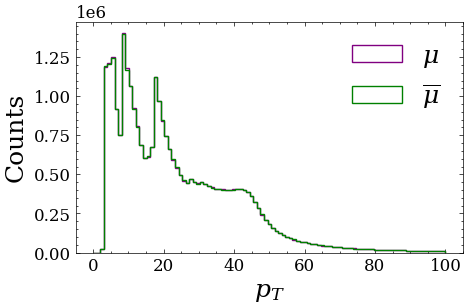

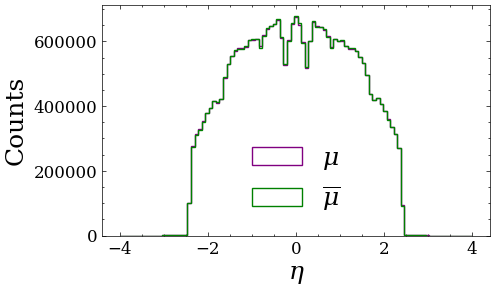

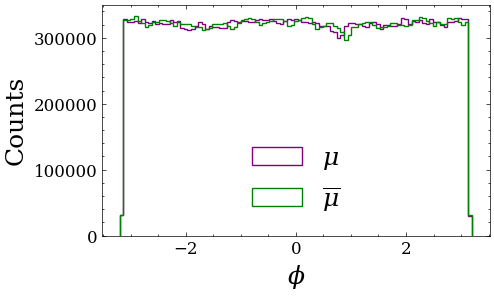

In [3]:
bins = {"pt":np.linspace(0, 100, 100), 
       "eta":np.linspace(-4, 4, 100),
       "phi":np.linspace(-3.2, 3.2, 100)
       }

nice_labels = {"pt":"$p_T$", 
       "eta":"$\eta$", 
       "phi":"$\phi$", 
       }


for key in keys:

    plt.figure()
    plt.hist(filtered_muons[key], bins = bins[key], histtype = "step", label = "$\mu$", color = "purple")
    plt.hist(filtered_amuons[key], bins = bins[key], histtype = "step", label = "$\overline{\mu}$", color = "green")
    plt.xlabel(nice_labels[key])
    plt.ylabel("Counts")
    plt.legend()
    plt.show()



In [ ]:

import vector

muon_mass = 0.1056583755 # GeV





mu_E = np.sqrt(muon_mass**2 + (filtered_muons["pt"]*np.cosh(filtered_muons["eta"]))**2)
amu_E = np.sqrt(muon_mass**2 + (filtered_amuons["pt"]*np.cosh(filtered_amuons["eta"]))**2)

mu_px = filtered_muons["pt"]*np.cos(filtered_muons["phi"])
amu_px = filtered_amuons["pt"]*np.cos(filtered_amuons["phi"])

mu_py = filtered_muons["pt"]*np.sin(filtered_muons["phi"])
amu_py = filtered_amuons["pt"]*np.sin(filtered_amuons["phi"])

mu_pz = filtered_muons["pt"]*np.sinh(filtered_muons["eta"])
amu_pz = filtered_amuons["pt"]*np.sinh(filtered_amuons["eta"])

dimu_E = mu_E + amu_E
dimu_px = mu_px + amu_px
dimu_py = mu_py + amu_py
dimu_pz = mu_pz + amu_pz

dimu_M = np.sqrt(dimu_E**2 - dimu_px**2 - dimu_py**2 - dimu_pz**2)

    


In [ ]:
bins = np.linspace(0.2, 0.7, 200)
#bins = np.logspace(-0.5, 2.5, 200)
loc_filter = (filtered_muons["pt"] > 0) & (filtered_amuons["pt"] > 0)


plt.figure(figsize = (10, 5))
plt.axvline(0.547, color = "red")
plt.hist(dimu_M[loc_filter], bins = bins, histtype = "step", label = "mu")
#plt.axvline(91)

plt.xlabel("$M_{mm}$")
plt.ylabel("Counts")
plt.yscale("log")
#plt.xscale("log")
plt.show()
    